In [1]:
#import the all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the csv file/read the dateset
df = pd.read_csv('blackFriday_train.csv')
df = df.sample(50000,random_state=1)
df.shape

(50000, 12)

In [3]:
#see the first 5 records in dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
470060,1000413,P00002542,M,26-35,11,C,0,0,8,14.0,NaN,8013
395974,1000984,P00003442,M,51-55,16,A,2,1,4,5.0,8.0,2769
14234,1002106,P00119542,F,18-25,20,A,3,1,8,14.0,NaN,5952
72183,1005091,P00177642,M,26-35,17,B,1,1,8,NaN,NaN,9914
272536,1006001,P00209742,F,26-35,7,A,0,1,1,11.0,15.0,15472


In [4]:
#see the last 5 records in dataset
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
215731,1003338,P00159442,M,46-50,16,C,3,1,5,8.0,NaN,5439
94254,1002541,P00197442,F,36-45,5,B,1,1,8,14.0,NaN,2132
307654,1005418,P00111742,F,26-35,0,C,1,1,15,NaN,NaN,17088
331321,1003070,P00118542,F,18-25,4,C,4+,0,5,8.0,NaN,7039
469153,1000261,P00102442,M,26-35,20,A,4+,0,8,NaN,NaN,7866


In [5]:
#To see if duplicates records present in dataset
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [6]:
#see the column names in dataset
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.drop(['User_ID', 'Product_ID'],inplace=True,axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
470060,M,26-35,11,C,0,0,8,14.0,NaN,8013
395974,M,51-55,16,A,2,1,4,5.0,8.0,2769
14234,F,18-25,20,A,3,1,8,14.0,NaN,5952
72183,M,26-35,17,B,1,1,8,NaN,NaN,9914
272536,F,26-35,7,A,0,1,1,11.0,15.0,15472


In [8]:
#see the size of dataset
df.shape

(50000, 10)

In [9]:
#see the information our dataset
#info() returns the no of colums,datatype of coluns,is there null value present in dataset it also show,no of records in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 470060 to 469153
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      50000 non-null  object 
 1   Age                         50000 non-null  object 
 2   Occupation                  50000 non-null  int64  
 3   City_Category               50000 non-null  object 
 4   Stay_In_Current_City_Years  50000 non-null  object 
 5   Marital_Status              50000 non-null  int64  
 6   Product_Category_1          50000 non-null  int64  
 7   Product_Category_2          34179 non-null  float64
 8   Product_Category_3          15069 non-null  float64
 9   Purchase                    50000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 4.2+ MB


In [10]:
#to see the column wise no of null values
df.isnull().sum()

Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            15821
Product_Category_3            34931
Purchase                          0
dtype: int64

In [11]:
pc2_mode = df['Product_Category_2'].mode()[0]
pc2_mode

8.0

In [12]:
df['Product_Category_2'].fillna(pc2_mode,inplace=True)

In [13]:
pc3_mode = df['Product_Category_3'].mode()[0]
pc3_mode

16.0

In [14]:
df['Product_Category_3'].fillna(pc3_mode,inplace=True)

In [15]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [16]:
#to see correlation between the features
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,8.106800,0.406560,5.395480,9.249180,15.01740,9262.914500
std,6.514443,0.491196,3.923155,4.284789,2.69754,5028.377123
min,0.000000,0.000000,1.000000,2.000000,3.00000,12.000000
25%,2.000000,0.000000,1.000000,8.000000,16.00000,5821.000000
50%,7.000000,0.000000,5.000000,8.000000,16.00000,8043.000000
75%,14.000000,1.000000,8.000000,14.000000,16.00000,12036.000000
max,20.000000,1.000000,20.000000,18.000000,18.00000,23958.000000


<AxesSubplot:>

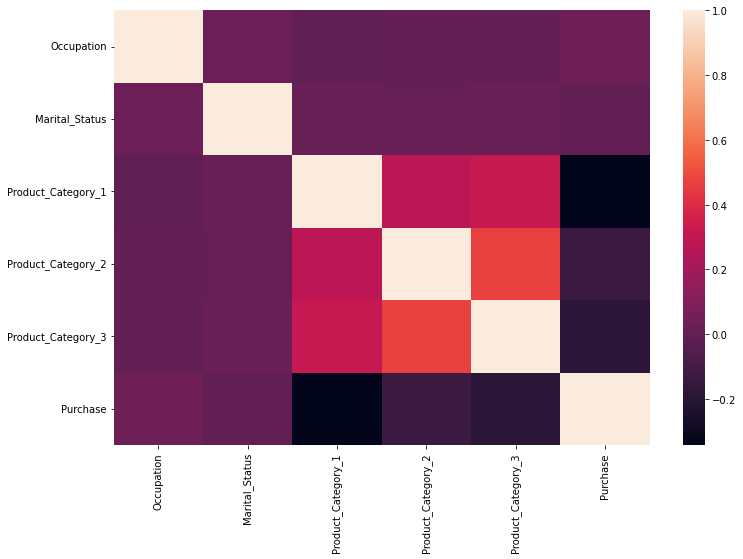

In [17]:
#To see the features behaviour like correlation in features,Noisy values.etc
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [18]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
470060,M,26-35,11,C,0,0,8,14.0,16.0,8013
395974,M,51-55,16,A,2,1,4,5.0,8.0,2769
14234,F,18-25,20,A,3,1,8,14.0,16.0,5952
72183,M,26-35,17,B,1,1,8,8.0,16.0,9914
272536,F,26-35,7,A,0,1,1,11.0,15.0,15472


In [19]:
df['Age'].unique()

array(['26-35', '51-55', '18-25', '36-45', '0-17', '55+', '46-50'],
      dtype=object)

In [20]:
df['City_Category'].unique()

array(['C', 'A', 'B'], dtype=object)

In [21]:
#Convert the categorical data into numeric form
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Age'] = label.fit_transform(df['Age'])
df['City_Category'] = label.fit_transform(df['City_Category'])
df['Gender'] = label.fit_transform(df['Gender'])

In [22]:
df['Stay_In_Current_City_Years'].unique()

array(['0', '2', '3', '1', '4+'], dtype=object)

In [23]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0':0, '2':2, '3':3, '1':1, '4+':4})

In [24]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
470060,1,2,11,2,0,0,8,14.0,16.0,8013
395974,1,5,16,0,2,1,4,5.0,8.0,2769
14234,0,1,20,0,3,1,8,14.0,16.0,5952
72183,1,2,17,1,1,1,8,8.0,16.0,9914
272536,0,2,7,0,0,1,1,11.0,15.0,15472


In [25]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [26]:
#Here we converting our data into one scale form 
#also u can perform MinMaxScalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
#StandardScaler function return data into array form

In [27]:
#see here we are converting scaleddata into Dataframe menas array into dataframe
df = pd.DataFrame(scaled_data,columns=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'])
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.574795,-0.362656,0.444125,1.263362,-1.435901,-0.827702,0.663891,1.108775,0.364261,-0.248575
1,0.574795,1.847136,1.211658,-1.367163,0.118491,1.208165,-0.355707,-0.991699,-2.601433,-1.291466
2,-1.739752,-1.099254,1.825685,-1.367163,0.895688,1.208165,0.663891,1.108775,0.364261,-0.658453
3,0.574795,-0.362656,1.365165,-0.051900,-0.658705,1.208165,0.663891,-0.291541,0.364261,0.129484
4,-1.739752,-0.362656,-0.169901,-1.367163,-1.435901,1.208165,-1.120405,0.408617,-0.006450,1.234821


In [28]:
#Now our data is ready to make model

In [29]:
#Here we spearate the data from our data set in dependent and independent variable
x = df.iloc[:,:-1] #independent variable or input data

y = df.iloc[:,-1:] #dependant variable or target

In [30]:
#Here we split the data into training and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Linear Regression Algorithm

In [31]:
#Now here we are training model with the help of linear regression algorithm
from sklearn.linear_model import LinearRegression
regre = LinearRegression()
regre.fit(x_train,y_train)

LinearRegression()

In [32]:
#here we predict the model from test data and get the dependent values from model prediction
y_pred = regre.predict(x_test)
y_pred
y_pred.shape

(10000, 1)

In [33]:
#see here in y_test our original data 
y_test.shape

(10000, 1)

In [34]:
x_train.shape

(40000, 9)

In [35]:
y_train.shape

(40000, 1)

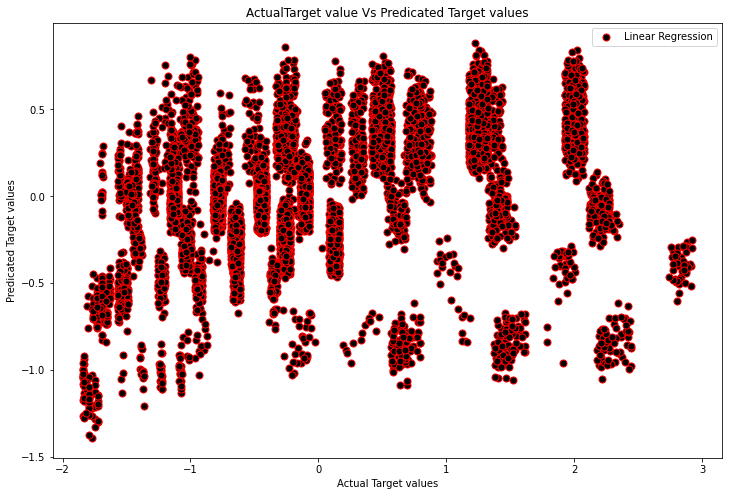

In [36]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred,c='k',label='Linear Regression',s=50,edgecolor='r')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

In [37]:
#Here we check the accuracy of our model and error
from sklearn.metrics import mean_squared_error,r2_score
lin_reg_MSE = mean_squared_error(y_test,y_pred)
print('Linear Regression MSE : ',lin_reg_MSE)

lin_reg_Score = r2_score(y_test,y_pred)
print('Linear Regression R2 score : ',lin_reg_Score)

print('Train Score: ', regre.score(x_train, y_train))  
print('Test Score: ', regre.score(x_test, y_test))

Linear Regression MSE :  0.8728794334856466
Linear Regression R2 score :  0.12640271042706797
Train Score:  0.13218057423999063
Test Score:  0.12640271042706797


# K-Nearest Neighbor Algorithm

In [38]:
#Now here we are training model with the help of K-NN regression algorithm
#first we check the how much neighbors to take train our model by using forloop to give optimal solution or good accuracy
#By using mean square error we see the how much error in the neighbours take min error it will give the good accuracy to our model
from sklearn.neighbors import KNeighborsRegressor
list1 = []
list2 = []
for i in range(3,16,2):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    from sklearn.metrics import mean_squared_error
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    list1.append(mse)
    list2.append(i)
print(list1)
print(list2)
#print(i)

[0.735055739951149, 0.6954356786872138, 0.688408879468167, 0.6837947185924198, 0.6825261153022246, 0.6818446653161984, 0.6827917448644062]
[3, 5, 7, 9, 11, 13, 15]


In [39]:
#convert k-neighbors and its values in datafram to plot graph
df = pd.DataFrame(list1,columns=['mse'])
df['k_values'] = list2
df

,mse,k_values
0,0.735056,3
1,0.695436,5
2,0.688409,7
3,0.683795,9
4,0.682526,11
5,0.681845,13
6,0.682792,15


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_values', ylabel='mse'>

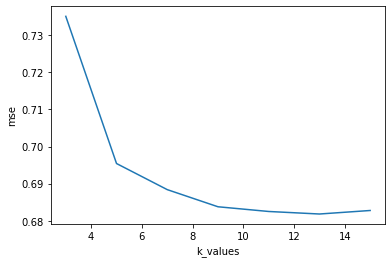

In [40]:
#here we plot the line graph
sns.lineplot(df.k_values,df.mse)
#df.plot(x = 'k_values',y='mse',kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_values', ylabel='mse'>

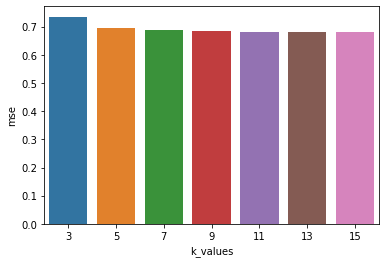

In [41]:
#here in this bar plot it shows
sns.barplot(df.k_values,df.mse)
#df.plot(x = 'k_values',y='mse',kind='bar')

In [42]:
#In above bar plot we see the 7 neighbors we will get min error so we take the 7 n_neighbors value to tarin our model
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(x_train,y_train)
knn

KNeighborsRegressor(n_neighbors=13)

In [43]:
#after training of model we will check the accuracy of model by using test data
#here we predict the devependet varaivble by given independent variable pass to our model it will return the predicated values
y_pred_knn = knn.predict(x_test)

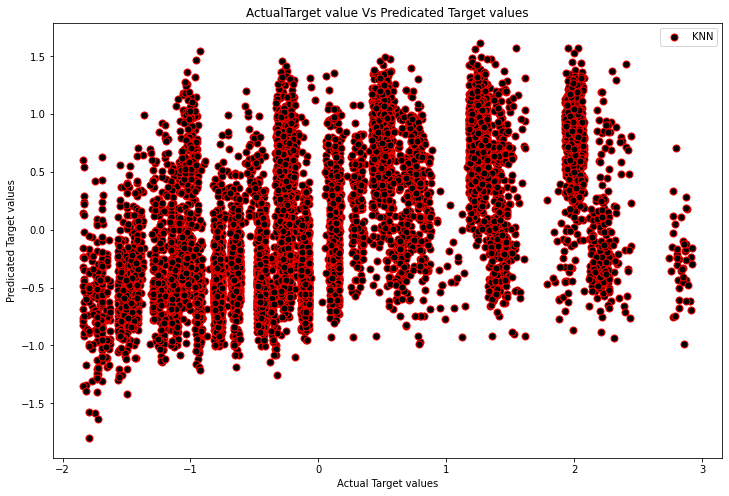

In [44]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_knn,c='k',label='KNN',s=50,edgecolor='r')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

In [45]:
#Here we check the accuracy of our model and error
knn_MSE = mean_squared_error(y_test,y_pred_knn)
print('KNN MSE : ',knn_MSE)

knn_Score = r2_score(y_test,y_pred)
print('KNN R2 score : ',knn_Score)

print('Train Score: ', knn.score(x_train, y_train))  
print('Test Score: ', knn.score(x_test, y_test))

KNN MSE :  0.6818446653161984
KNN R2 score :  0.3166467271723997
Train Score:  0.4250469108064223
Test Score:  0.31759458559887277


# Support Vector Machine (SVM) for Regression 

In [46]:
#Now here we are training model with the help of Support Vector Algorithm
#Here we check the which kernal is best suitable to our dataset and minumum error
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
kernel_name = ['linear', 'poly', 'rbf']
Min_mean_squared_error = []
for i in kernel_name:
    cv_reg = SVR(kernel=i)#SVC = support vector classifier
    cv_reg.fit(x_train,y_train)
    y_pred = cv_reg.predict(x_test)
    error = mean_squared_error(y_test,y_pred)
    Min_mean_squared_error.append(error)
Min_mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0.9078691434996803, 0.8124213389757139, 0.7260704162189723]

In [47]:
#we create the dataframe to plot barplot
df = pd.DataFrame({'kernal':kernel_name,'Min_mean_squared_error':Min_mean_squared_error})
df

,kernal,Min_mean_squared_error
0,linear,0.907869
1,poly,0.812421
2,rbf,0.726070


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

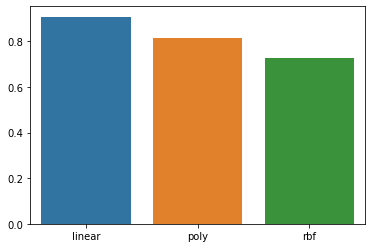

In [48]:
sns.barplot(kernel_name,Min_mean_squared_error)

# plt.bar(kernel_name,Min_mean_squared_error)
# plt.xlabel('Kernal')
# plt.ylabel('Accuracy')

# df.plot(kind='bar')
# plt.xlabel('Kernal')
# plt.ylabel('Accuracy')

In [49]:
#in above graph we see linear kernal is best fit to ur dataset so we use linear kernal
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [50]:
#test the model bu using test data
y_pred_svr = svr_reg.predict(x_test)

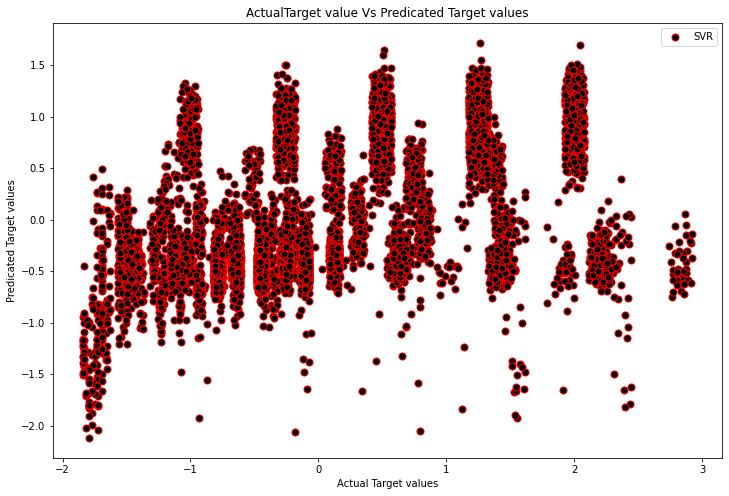

In [51]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_svr,c='k',label='SVR',s=50,edgecolor='r')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

In [52]:
#Here we check the accuracy of our model and error
SVM_MSE = mean_squared_error(y_test,y_pred_svr)
print('SVM MSE : ',SVM_MSE)

SVM_Score = r2_score(y_test,y_pred_svr)
print('SVM R2 score : ',SVM_Score)

print('Train Score: ', svr_reg.score(x_train, y_train))  
print('Test Score: ', svr_reg.score(x_test, y_test))


SVM MSE :  0.7260704162189723
SVM R2 score :  0.27333246343646966
Train Score:  0.3135977108077842
Test Score:  0.27333246343646966


# Decision Tree Algorithm

In [53]:
#Now here we are training model with the help of Decision Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
dt_regression = DecisionTreeRegressor()
dt_regression.fit(x_train,y_train)

DecisionTreeRegressor()

In [54]:
#plotting decision tree of our model
# from sklearn import tree
# fig = plt.figure(figsize=(15,12))
# x=tree.plot_tree(dt_regression)

In [55]:
#test the model by using test data
y_pred_DT = dt_regression.predict(x_test)

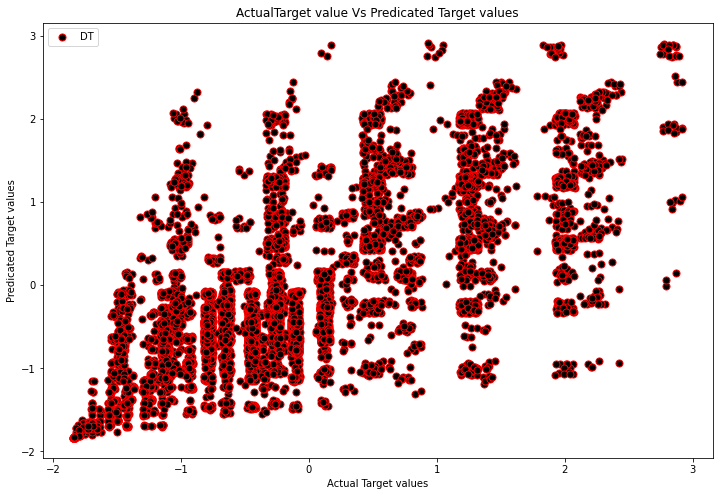

In [56]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_DT,c='k',label='DT',s=50,edgecolor='r')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

In [57]:
#Here we check the accuracy of our model and error
DT_MSE = mean_squared_error(y_test,y_pred_DT)
print('DT MSE : ',DT_MSE)

DT_Score = r2_score(y_test,y_pred_DT)
print('DT R2 score : ',DT_Score)

print('Train Score: ', dt_regression.score(x_train, y_train))  
print('Test Score: ', dt_regression.score(x_test, y_test))

DT MSE :  0.5807194408591936
DT R2 score :  0.4188029754452426
Train Score:  0.9084583719184129
Test Score:  0.4188029754452426


# Random Forest Algorithm

In [58]:
#Now here we are training model with the help of Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
RFARegree = RandomForestRegressor(n_estimators=60) #n_estimators less error maximum and more error less
RFARegree.fit(x_train,y_train)

C:\Users\vbkat\AppData\Local\Temp/ipykernel_16000/518917126.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFARegree.fit(x_train,y_train)


RandomForestRegressor(n_estimators=60)

In [59]:
#test the model by using test data
y_pred_RF = RFARegree.predict(x_test)

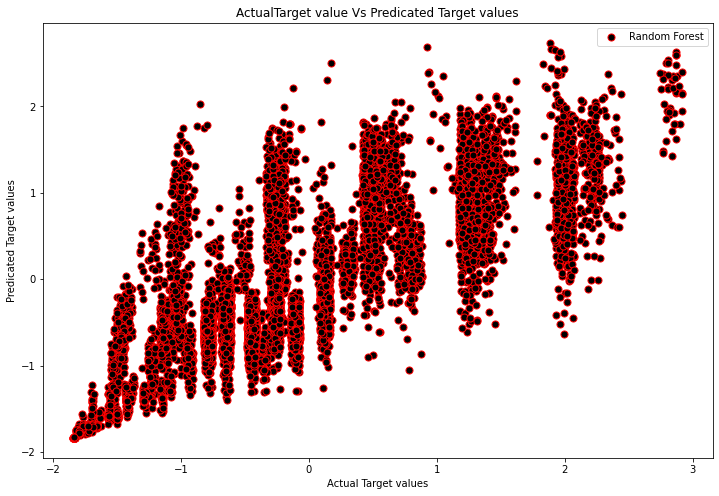

In [60]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_RF,c='k',label='Random Forest',s=50,edgecolor='r')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

In [61]:
#Here we check the accuracy of our model and error
RF_MSE = mean_squared_error(y_test,y_pred_RF)
print('RF MSE : ',RF_MSE)

RF_Score = r2_score(y_test,y_pred_RF)
print('RF R2 score : ',RF_Score)

print('Train Score: ', RFARegree.score(x_train, y_train))  
print('Test Score: ', RFARegree.score(x_test, y_test))

RF MSE :  0.3992776814972447
RF R2 score :  0.600393952518652
Train Score:  0.8764808670335379
Test Score:  0.600393952518652


# All Regression Type algorithm result

In [62]:
#Here we check the accuracy of our model and error
from sklearn.metrics import mean_squared_error,r2_score
lin_reg_MSE = mean_squared_error(y_test,y_pred)
print('Linear Regression MSE : ',lin_reg_MSE)
lin_reg_Score = r2_score(y_test,y_pred)
print('Linear Regression R2 score : ',lin_reg_Score)
LR_train = regre.score(x_train, y_train)
LR_test = regre.score(x_test, y_test)
print('Train Score: ', LR_train)  
print('Test Score: ', LR_test)
print('\n')

#Here we check the accuracy of our model and error
knn_MSE = mean_squared_error(y_test,y_pred_knn)
print('KNN MSE : ',knn_MSE)
knn_Score = r2_score(y_test,y_pred_knn)
print('KNN R2 score : ',knn_Score)
KNN_train = knn.score(x_train, y_train)
KNN_test = knn.score(x_test, y_test)
print('Train Score: ', KNN_train)  
print('Test Score: ', KNN_test)
print('\n')

#Here we check the accuracy of our model and error
SVM_MSE = mean_squared_error(y_test,y_pred_svr)
print('SVM MSE : ',SVM_MSE)
SVM_Score = r2_score(y_test,y_pred_svr)
print('SVM R2 score : ',SVM_Score)
SVM_train = svr_reg.score(x_train, y_train)
SVM_test = svr_reg.score(x_test, y_test)
print('Train Score: ', SVM_train)  
print('Test Score: ', SVM_test)
print('\n')

#Here we check the accuracy of our model and error
DT_MSE = mean_squared_error(y_test,y_pred_DT)
print('DT MSE : ',DT_MSE)
DT_Score = r2_score(y_test,y_pred_DT)
print('DT R2 score : ',DT_Score)
DT_train = dt_regression.score(x_train, y_train)
DT_test = dt_regression.score(x_test, y_test)
print('Train Score: ', DT_train)  
print('Test Score: ', DT_test)
print('\n')

#Here we check the accuracy of our model and error
RF_MSE = mean_squared_error(y_test,y_pred_RF)
print('RF MSE : ',RF_MSE)
RF_Score = r2_score(y_test,y_pred_RF)
print('RF R2 score : ',RF_Score)
RF_train = RFARegree.score(x_train, y_train)
RF_test = RFARegree.score(x_test, y_test)
print('Train Score: ', RF_train)  
print('Test Score: ', RF_test)

Linear Regression MSE :  0.7260704162189723
Linear Regression R2 score :  0.27333246343646966
Train Score:  0.13218057423999063
Test Score:  0.12640271042706797


KNN MSE :  0.6818446653161984
KNN R2 score :  0.31759458559887277
Train Score:  0.4250469108064223
Test Score:  0.31759458559887277


SVM MSE :  0.7260704162189723
SVM R2 score :  0.27333246343646966
Train Score:  0.3135977108077842
Test Score:  0.27333246343646966


DT MSE :  0.5807194408591936
DT R2 score :  0.4188029754452426
Train Score:  0.9084583719184129
Test Score:  0.4188029754452426


RF MSE :  0.3992776814972447
RF R2 score :  0.600393952518652
Train Score:  0.8764808670335379
Test Score:  0.600393952518652


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


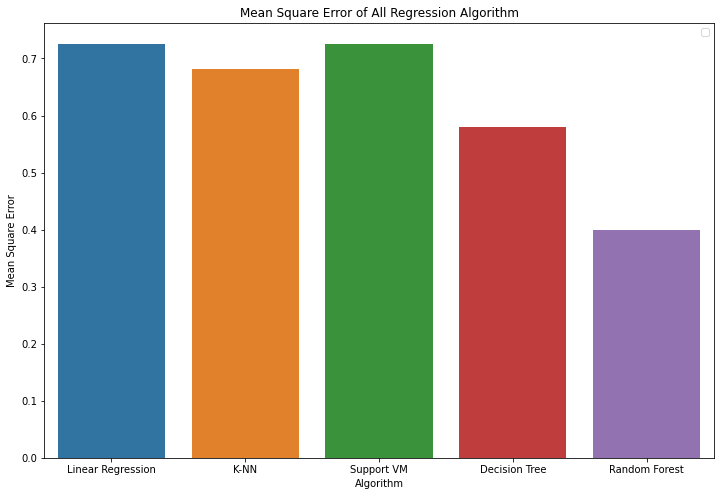

In [63]:
#Here we take minimum error it will give us more accuracy of our model
#plot says Support Vector Machine Algorithm is best to our dataset or model
Algorithm = ['Linear Regression','K-NN','Support VM','Decision Tree','Random Forest']
Mean_Sq_Error = [lin_reg_MSE,knn_MSE,SVM_MSE,DT_MSE,RF_MSE]
plt.figure(figsize=(12,8))
sns.barplot(Algorithm,Mean_Sq_Error)
plt.xlabel('Algorithm')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error of All Regression Algorithm')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


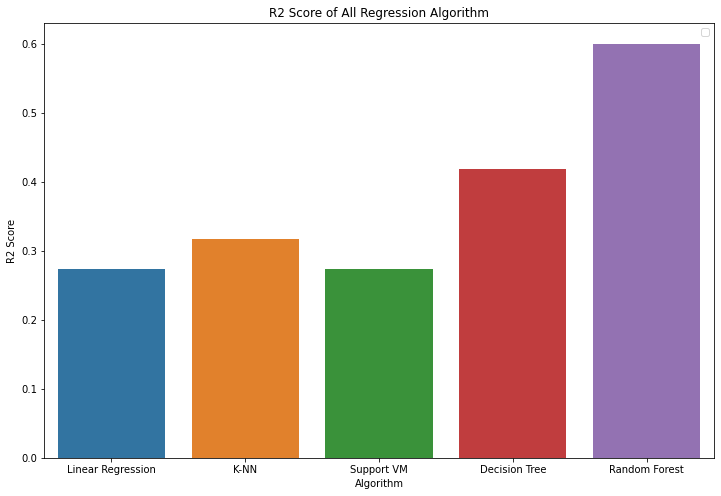

In [64]:
#here in r2 score we take maximum value or nearby 1 it means our model working good on SVR algorithm
#barplot says Support Vector Machine Algorithm gives good score we can go with SVM to make model
Algorithm = ['Linear Regression','K-NN','Support VM','Decision Tree','Random Forest']
R2_Score = [lin_reg_Score,knn_Score,SVM_Score,DT_Score,RF_Score]
plt.figure(figsize=(12,8))
sns.barplot(Algorithm,R2_Score)
plt.xlabel('Algorithm')
plt.ylabel('R2 Score')
plt.title('R2 Score of All Regression Algorithm')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


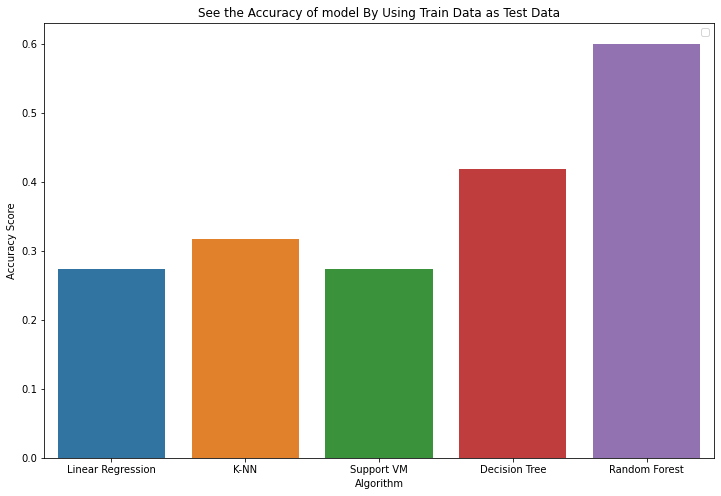

In [65]:
#In this plot we see the how model perofrm on traning data set passed by as test data
Algorithm = ['Linear Regression','K-NN','Support VM','Decision Tree','Random Forest']
train_data_as_test_data = [LR_train,KNN_train,SVM_train,DT_train,RF_train]
plt.figure(figsize=(12,8))
sns.barplot(Algorithm,R2_Score)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('See the Accuracy of model By Using Train Data as Test Data')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


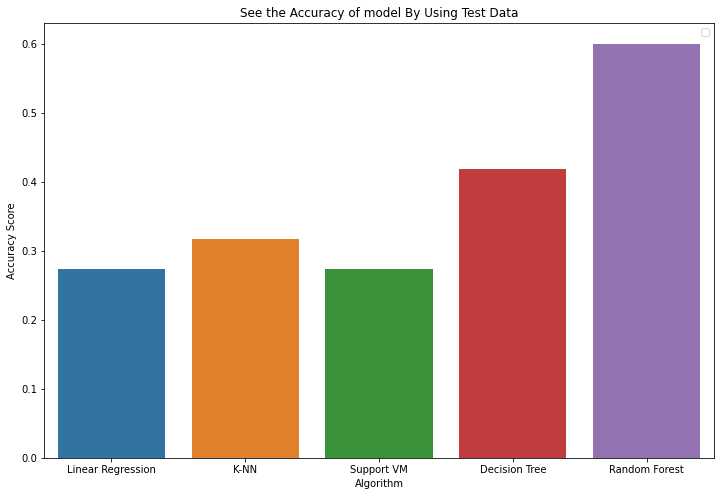

In [66]:
#Here in this plot we see how model perfomrm on test data
Algorithm = ['Linear Regression','K-NN','Support VM','Decision Tree','Random Forest']
test_data_as_test_data = [LR_test,KNN_test,SVM_test,DT_test,RF_test]
plt.figure(figsize=(12,8))
sns.barplot(Algorithm,R2_Score)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('See the Accuracy of model By Using Test Data')
plt.legend()

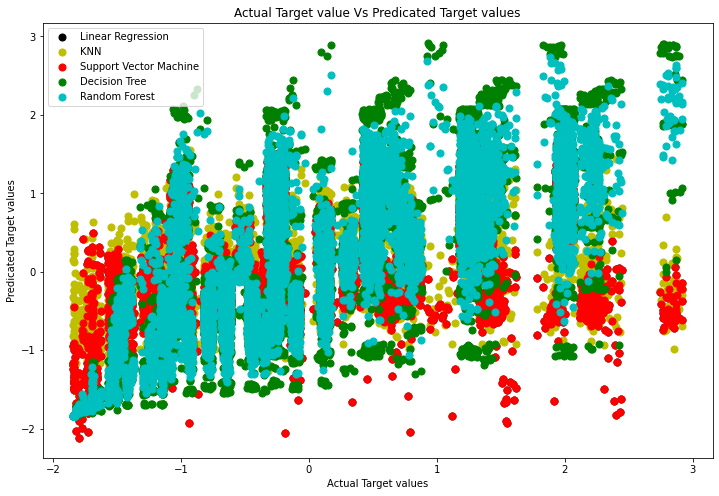

In [67]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred,c='k',label='Linear Regression',s=50)
plt.scatter(y_test,y_pred_knn,c='y',label='KNN',s=50)
plt.scatter(y_test,y_pred_svr,c='r',label='Support Vector Machine',s=50)
plt.scatter(y_test,y_pred_DT,c='g',label='Decision Tree',s=50)
plt.scatter(y_test,y_pred_RF,c='c',label='Random Forest',s=50)
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('Actual Target value Vs Predicated Target values')
plt.legend()
plt.show()

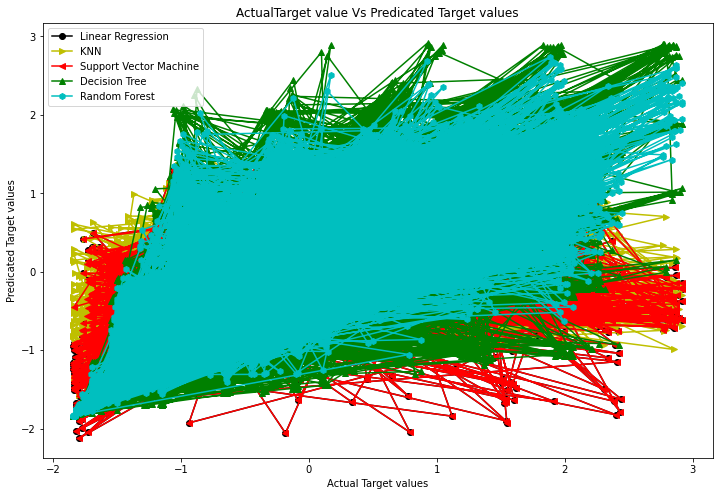

In [68]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.plot(y_test,y_pred,c='k',label='Linear Regression',marker='o')
plt.plot(y_test,y_pred_knn,c='y',label='KNN',marker='>')
plt.plot(y_test,y_pred_svr,c='r',label='Support Vector Machine',marker='<')
plt.plot(y_test,y_pred_DT,c='g',label='Decision Tree',marker='^')
plt.plot(y_test,y_pred_RF,c='c',label='Random Forest',marker='h')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

# Ridge and Lasso

In [69]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
paramters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor  = GridSearchCV(ridge,paramters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso  = Lasso()
paramters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,paramters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-0.8684460444810427
{'alpha': 1e-08}
-0.8684469658523495
